# What Factors Affect Laptop Prices?

Danh sách thành viên nhóm 1 - S2:

| STT | MSSV | Họ và Tên |
| --- | --- | :-- |
| 35 | 20133076 | Văn Mai Thanh Nhật |
| 42 | 20133082 | Huỳnh Minh Phước |
| 3 | 20133029 | Nguyễn Trí Dũng |
| 14 | 20133047 | Lương Gia Huy |


## Phần 1 - Giới thiệu

### 1.1 Thông tin dữ liệu:
**Bộ dữ liệu**: *Thông số kỹ thuật và giá thành của laptop hiện nay*

**Nguồn dữ liệu**:  [Flipkart.com](https://www.flipkart.com/) 

**Phương pháp thu thập**: [Instant Data Scrapper](https://chrome.google.com/webstore/detail/instant-data-scraper/ofaokhiedipichpaobibbnahnkdoiiah)

### Input
- Thương hiệu, 
- Tên vi xử lí, Thương hiệu vi xử lí, Thế hệ vi xử lí, 
- Dung lượng ram, Loại ram
- Dung lượng ổ cứng ssd, Dung lượng ổ cứng hdd
- Hệ điều hành, Loại hệ điều hành
- Dung lượng card đồ hoạ
- Cân nặng, Kích thước màn hình 
- Số năm bảo hành của hãng, Cảm ứng màn hình, Ứng dụng MSOffice

### Nhóm đã sử dụng những thuật toán:
- ANOVA F test: Nhiều nhóm độc lập
- T-test : 2 nhóm độc lập
- multicollinearity(đa cộng tuyến): dùng VIF
- backward elimination: Loại bỏ các biến có p-values > 0,05

### Để:
- Tìm ra mối quan hệ của từng biến thông số kĩ thuật với giá của laptop
- Dự đoán giá của một chiếc laptop dựa trên những thuộc tính được người dùng lựa chọn

## Phần 2 - Dữ liệu
### 2.1 Đọc dữ liệu:

In [16]:
import pandas as pd
df = pd.read_csv('.\data\Cleaned_Laptop_data.csv')
# IN 5 DÒNG ĐẦU DỮ LIỆU
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,NaN,0,No,No,324.870,426.270,23,3.700,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,NaN,0,No,No,254.670,277.225,8,3.600,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,259.870,363.870,28,3.700,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,279.370,363.870,23,3.700,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,NaN,0,No,No,324.870,435.370,25,3.700,1657,234


### 2.2 Tiền xử lý:

<AxesSubplot:>

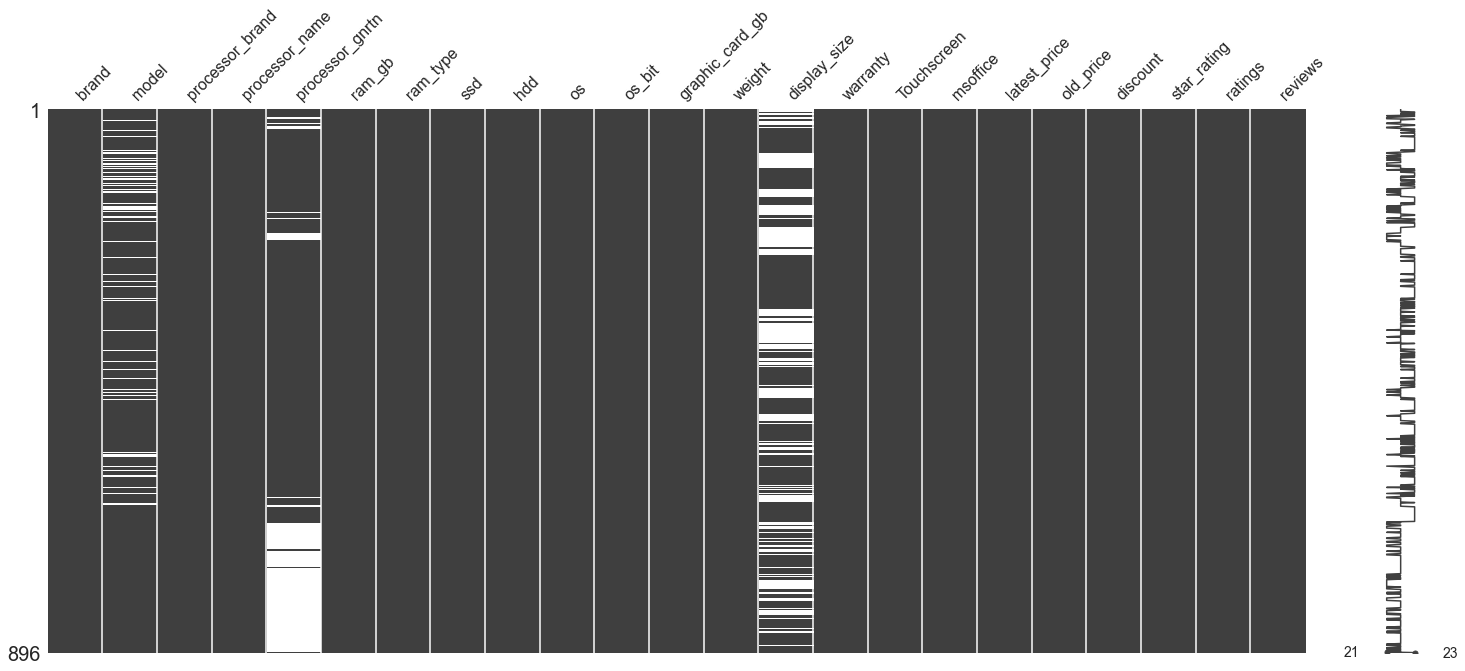

In [17]:
# BIỄU DIỄN NHỮNG THUỘC TÍNH BỊ THIẾU
import missingno as msno
msno.matrix(df)

**Những cột bị thiếu dữ liệu:**
- model ( dòng máy)
- processor_gnrtn ( thế hệ vi xử lý)
- display_size ( kích thước màn hình)

**Xử lí dữ liệu bị thiếu:**
- Model: “Unknow”
- processor_gnrtn: 11th
- display_size: 15.6

## Phần 3 - Trực quan hóa dữ liệu


### 3.1 Thống kê Thương hiệu:
![thuonghieu](https://scontent.fsgn2-6.fna.fbcdn.net/v/t1.15752-9/282672722_1475722452843904_8253311341104898062_n.png?_nc_cat=110&ccb=1-7&_nc_sid=ae9488&_nc_ohc=bapelPNT9mAAX_3bdPu&tn=h4Y5nwqZHD89sY9C&_nc_ht=scontent.fsgn2-6.fna&oh=03_AVLH_NvPbFuR1v3dxu7f9dW1fJgyssRm7giQPfbugS5T7A&oe=62CAF017)

### 3.2 Thống kê dòng máy:
![dongmay](https://scontent.fsgn2-3.fna.fbcdn.net/v/t1.15752-9/280478077_429281892348436_863000874952818378_n.png?_nc_cat=108&ccb=1-7&_nc_sid=ae9488&_nc_ohc=HzRDq3ZGSrsAX-fn15C&_nc_ht=scontent.fsgn2-3.fna&oh=03_AVLRkGdJu02Vn0Q7P8Bis0hQrTqW1hEQU8DKsLHO0wAEnQ&oe=62C8CFEE)

### 3.3 Thống kê vi xử lý:
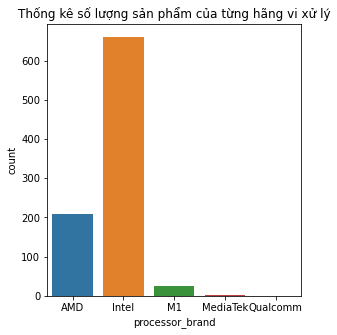

![thuonghieu](https://scontent.fsgn2-6.fna.fbcdn.net/v/t1.15752-9/282235416_408057464578304_7778493016498276054_n.png?_nc_cat=100&ccb=1-7&_nc_sid=ae9488&_nc_ohc=JSsVsMyeaFwAX8P67QM&_nc_ht=scontent.fsgn2-6.fna&oh=03_AVLLL7wDwWREVXlrxFXdkfky9vg_inzmtPVnulRNieGf6A&oe=62CAF64D)

### 3.4 Thống kê về RAM:
![thuonghieu](https://scontent.fsgn2-5.fna.fbcdn.net/v/t1.15752-9/281415679_1094685421257737_5776154087543146473_n.png?_nc_cat=102&ccb=1-7&_nc_sid=ae9488&_nc_ohc=Vl6axt1-6DUAX8XdDdM&_nc_ht=scontent.fsgn2-5.fna&oh=03_AVIUHPo0t8aZ-ueGLU_AfeA8lrjD9vYjmxXdmvnfLocszA&oe=62CA9182)

### 3.5 Thống kê về ổ đĩa cứng:
![thuonghieu](https://scontent.fsgn2-4.fna.fbcdn.net/v/t1.15752-9/286473326_729163514801538_5924143027279422074_n.png?_nc_cat=101&ccb=1-7&_nc_sid=ae9488&_nc_ohc=iT2zbJPY5hgAX9t_pGV&_nc_ht=scontent.fsgn2-4.fna&oh=03_AVKtb51PunGfdlMPQ_-_IfYcBdzkw3of6vNfS937dd6Ycw&oe=62C9560F)

## Phần 4 - Thực nghiệm, kết quả, và thảo luận

### Kiểm định thống kê
Đặt giả thuyết liệu có sự khác nhau về giá giữa các nhóm độc lập. 
- H0: Giá bằng nhau giữa các nhóm độc lập, 
- H1: Giá khác nhau giữa các nhóm độc lập.

Thực hiện kiểm định giả thuyết với độ tin cậy 95%.
- Với các biến có giá trị p-value < mức ý nghĩa (0.05), phủ nhận H0 và kết luận biến có ảnh hưởng tới giá cuối cùng.
- Với các biến có giá trị p-value > mức ý nghĩa (0.05), chấp nhận H0 và kết luận biến không ảnh hưởng tới mức giá cuối cùng.

### 4.1 Hệ điều hành:
![thuonghieu](https://scontent.fsgn4-1.fna.fbcdn.net/v/t1.15752-9/281872004_330093749142162_3105197428303246505_n.png?_nc_cat=101&ccb=1-7&_nc_sid=ae9488&_nc_ohc=BbNTZGdBbhIAX___U2F&_nc_ht=scontent.fsgn4-1.fna&oh=03_AVLd_c4zJMAtRuvKZV0eHXp5ABr84azPBzkvTA5l1X3nwQ&oe=62CCEE8D)

 |  os     |     count     |        mean (USD)      |      std | 
   | --- | --- | --- | --- |                                              
 | DOS     |    36.0  |  1638.545 |  1016.539 | 
 | Mac     |    28.0  |  1972.202  |  713.794 | 
 | Windows  |  832.0  |   931.067  |  530.290 | 

### 4.2 Dung lượng card đồ hoạ:
![thuonghieu](https://scontent.fsgn13-1.fna.fbcdn.net/v/t1.15752-9/286003600_762975421385991_7329089836649335022_n.png?_nc_cat=109&ccb=1-7&_nc_sid=ae9488&_nc_ohc=vsOXrJ4xYYAAX-YFI-Z&_nc_ht=scontent.fsgn13-1.fna&oh=03_AVKyq_ly-jMzM2uWe1e_EVCJtQ8PVH65axXi6Lq4VDG4BQ&oe=62CD25DA)

| graphic_card_gb |  count    |  mean (USD)  |   std| 
| --- | --- | --- | --- |                      
| 0           |     631.000 |  849.326 |  487.437| 
| 2         |        69.000 |  1005.079 |  366.039| 
| 4         |       138.000 | 1163.368 | 436.149 | 
| 6         |        40.000 | 1942.713 | 943.137 | 
| 8         |        18.000 | 2518.265 | 910.916 | 

### 4.3 Cân nặng:
![thuonghieu](https://scontent.fsgn8-2.fna.fbcdn.net/v/t1.15752-9/283302047_811995543096127_9170360250185452667_n.png?_nc_cat=100&ccb=1-7&_nc_sid=ae9488&_nc_ohc=rGKY7PKeZSAAX_pw95a&_nc_ht=scontent.fsgn8-2.fna&oh=03_AVKu4VN1kcLHQM_qAFZpyJb5r3xAT2lQ5GCNnLovpu3LbA&oe=62CDC8C2)

| weight     |       count      |     mean (USD)     |       std | 
         | --- | --- | --- | --- |                              
| Casual   |    566.0 |  1109.818 |  682.299 | 
| Gaming    |    39.0 |  964.783 |  212.176 | 
| ThinNlight |  291.0 |  766.576 |  377.096 | 

### 4.4 Kích thước màn hình:
![thuonghieu](https://scontent-hkg4-2.xx.fbcdn.net/v/t1.15752-9/285083323_433215438815716_5159604064040461482_n.png?_nc_cat=110&ccb=1-7&_nc_sid=ae9488&_nc_ohc=Xf6zQqBvJ-kAX-k4LnA&_nc_ht=scontent-hkg4-2.xx&oh=03_AVIv8JhPl_qdlB2zPfJbiUNwmSerF_Ntt0DARVyZTJlnoQ&oe=62CD1F16)

| display_size   |   count |     mean (USD)   |    std
| --- | --- | --- | --- |             
| 12.200     |     2.000 |  623.870  |  91.924 | 
| 13.000     |     4.000 |  1660.620 | 792.209 | 
| 13.300     |    40.000 |  1253.278 | 342.811 | 
| 13.400     |     1.000 |  1494.870 |    NaN | 
| 14.000     |   131.000 |  748.053  | 239.276 | 
| 14.100     |     6.000 |  532.025  |  84.252 | 
| 14.200     |     3.000 |  2760.203 | 307.728 | 
| 14.900     |    1.000  |  725.270  |    NaN | 
| 14.960     |    7.000  |  529.899  | 38.635 | 
| 15.000     |   3.000   |  600.037  | 155.774 | 
| 15.600     |  550.000  |  887.185  | 593.780 | 
| 16.000     |  135.000  |  1521.928 | 495.255 | 
| 16.100     |    1.000  |  1780.870 |    NaN | 
| 16.200     |    3.000  |  3379.870 | 574.947 | 
| 17.300     |   9.000   |  922.884  | 120.919 |

### 4.5 Màn hình cảm ứng:
![thuonghieu](https://scontent.fsgn8-2.fna.fbcdn.net/v/t1.15752-9/284249996_3202926826621692_4690140758340693335_n.png?_nc_cat=105&ccb=1-7&_nc_sid=ae9488&_nc_ohc=JMzy33OA65sAX-ZTQra&_nc_ht=scontent.fsgn8-2.fna&oh=03_AVJorthRUihZKDCEIESqrG3hZ-PHHpNNImgSY9Zm4W9tqQ&oe=62CC428E)

| Touchscreen       |       count    |       mean (USD)   |         std | 
| --- | --- | --- | --- |                                   
| No    |        793.0 |  954.524 |  605.247| 
| Yes     |      103.0 |  1280.772 |  531.519 | 

### 4.6 Hãng sản xuất:
![thuonghieu](https://scontent-hkg4-2.xx.fbcdn.net/v/t1.15752-9/281343893_783892449447047_7785394133959564897_n.png?_nc_cat=110&ccb=1-7&_nc_sid=ae9488&_nc_ohc=QhcdhqarN8oAX8UHshV&_nc_ht=scontent-hkg4-2.xx&oh=03_AVJR-nSZ5otc87F15GQFCmn4uLji0hcje8LfFkOqunZ0mg&oe=62D021D9)

| brand     |         count |     mean (USD)  |    std| 
| --- | --- | --- | --- |                    
| ALIENWARE |   4.000 |  3345.745 |  855.604| 
| APPLE     |  28.000 | 1972.202 | 713.794| 
| ASUS      | 254.000 | 1029.882 | 671.269| 
| Avita     |  18.000 |  724.868 | 296.798| 
| DELL      | 154.000 |  806.389 | 307.666| 
| HP        | 142.000 |  933.170 | 481.531| 
| Infinix   |   4.000 |  531.245 | 135.555| 
| LG        |   5.000 |  990.470 | 111.224| 
| Lenovo    | 148.000 |  935.023 | 552.777| 
| MICROSOFT |   3.000 | 1266.109  | 60.741| 
| MSI       |  52.000 | 1267.158 | 725.605| 
| Mi        |   2.000 |  744.120 |  41.366| 
| Nokia     |   4.000 |  658.970  | 59.042| 
| RedmiBook |   3.000 |  567.537  | 65.432| 
| SAMSUNG   |   1.000 |  506.870  |    NaN| 
| Smartron  |   3.000 |  645.537  | 75.056| 
| Vaio      |   5.000 |  723.970  | 70.644| 
| acer      |  58.000 |  938.916 | 441.710| 
| iball     |   1.000 |  181.870  |    NaN| 
| lenovo    |   3.000 | 1507.905 | 659.991| 
| realme    |   4.000 |  679.178  | 83.183| 

### 4.7 Thế hệ bộ xử lí:
![thuonghieu](https://scontent.fsgn8-2.fna.fbcdn.net/v/t1.15752-9/287034590_333665388903273_8176234667698941116_n.png?_nc_cat=105&ccb=1-7&_nc_sid=ae9488&_nc_ohc=W3VWr-VTivoAX_VdwzJ&_nc_ht=scontent.fsgn8-2.fna&oh=03_AVL5aqcJiIky2sVQBwovBBjPaotLAi2Obg2Lv7gHLm8xmw&oe=62CEA6BB)

| processor_gnrtn |   count |    mean (USD)  |    std |
| --- | --- | --- | --- |                              
| 10th  |          246.000 | 1150.804 |  819.481 |
| 11th   |         585.000 |  911.265 |  458.100 |
| 12th   |           3.000 | 3119.870 | 1133.314 |
| 4th    |           1.000 |  682.370 |      NaN |
| 7th    |         12.000 |  718.832 |  184.448 |
| 8th     |         43.000 | 1096.424 |  470.956 |
| 9th     |          6.000 | 1142.592 |  906.346 |

### 4.8 Dung lượng RAM:
![thuonghieu](https://scontent.fsgn13-2.fna.fbcdn.net/v/t1.15752-9/287111549_386464246835303_4588019479339511713_n.png?_nc_cat=106&ccb=1-7&_nc_sid=ae9488&_nc_ohc=VRRZMIA1MssAX_M-PZ-&_nc_ht=scontent.fsgn13-2.fna&oh=03_AVLRO8UGg9HfqqMBl7c3cpV07RCkJBfRAVN5rvMT1Dthsg&oe=62CF208C)

| ram_gb  |   count  |          mean (USD)  |           std   |  
| --- | --- | --- | --- |
| 16 GB GB |  180.0 |  1546.418 |   749.426 | 
| 32 GB GB |    3.0 |  2196.476 |  1840.128 | 
| 4 GB GB  |  259.0 |   773.084 |   475.132 | 
| 8 GB GB  |  454.0  |  889.172  |  436.232 | 

### 4.9 Dung lượng SSD:
![thuonghieu](https://scontent.fsgn13-1.fna.fbcdn.net/v/t1.15752-9/282262130_417762020232303_1144190609955541225_n.png?_nc_cat=104&ccb=1-7&_nc_sid=ae9488&_nc_ohc=CjiJmuiI4GsAX_A4cp9&_nc_ht=scontent.fsgn13-1.fna&oh=03_AVKiA2l4C8Iz4Wfg4XhMLdfGFHh548Fqr29ZvEaRbG0ZNg&oe=62CCB7B1)

|ssd       |    count  |   mean (USD)   |  std |
| --- | --- | --- | --- |                    
|0 GB    |151.000 | 804.454 | 704.288|
|1024 GB |111.000 |1802.738 |682.903|
|128 GB  | 12.000 | 921.182 |446.992|
|2048 GB |  2.000 |2560.870 |680.237|
|256 GB  |201.000 | 695.680 |271.488|
|3072 GB |  1.000 |5745.870 |    NaN|
|32 GB   |  1.000 |  349.687|     NaN|
|512 GB  |417.000 | 971.649 |384.358|

### 4.10 Dung lượng HDD:
![thuonghieu](https://scontent.fsgn8-2.fna.fbcdn.net/v/t1.15752-9/284354867_458581426148476_6174224285986011714_n.png?_nc_cat=100&ccb=1-7&_nc_sid=ae9488&_nc_ohc=1jsI2LXp6u4AX-4T7Ll&_nc_ht=scontent.fsgn8-2.fna&oh=03_AVKyTPku0mMj0zapVNMTf1C2ESNA7lh0ERbD3qPQvGcgTA&oe=62CFB2B7)

| hdd |       count |         mean (USD)     |      std      |    
| --- | --- | --- | --- |
| 0 GB   |  666.0 | 1051.577 | 597.495 |
| 1024 GB | 164.0 | 690.629 | 254.652 |
| 2048 GB  |  1.0 | 810.121 |          NaN |
|512 GB   | 65.0 | 1145.137 | 983.106 |

## Phần 5 - Dự đoán giá laptop

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output

df = pd.read_csv('.\data\Cleaned_Laptop_data.csv',encoding='latin-1')
df = df.replace('Missing', float("NaN"))
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ssd'] = df['ssd'].str.replace(' GB', '').astype(int)
df['ram_gb'] = df['ram_gb'].str.replace(' GB GB', '').astype(int)
df['hdd'] = df['hdd'].str.replace(' GB', '').astype(int)
df['processor_gnrtn'] = df['processor_gnrtn'].str.replace('th', '').astype(int)
df['display_size'] = df['display_size'].astype(float)
df['Touchscreen'] = df['Touchscreen'].map({'No':0, 'Yes':1})
cdf = df[['ram_gb','ssd','hdd','processor_gnrtn','graphic_card_gb','display_size', 'warranty', 'Touchscreen', 'star_rating', 'ratings', 'reviews', 'latest_price']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
  

vif_df = pd.DataFrame()
vif_df["feature"] = cdf.columns
vif_df["VIF"] = [variance_inflation_factor(cdf.values, i)
                          for i in range(len(cdf.columns))]

x là các biến độc lập , y là latest_price.
Hàm train_test_split là để chọn 80% để train, 20% để test (test_size) (Không chọn ngẫu nhiên, random_state = 0)

In [19]:
from sklearn.model_selection import train_test_split
x = cdf.drop(['latest_price'], axis = 1)
y = cdf['latest_price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Xây dựng mô hình hồi quy tuyến tính.

Dựa vào bảng dưới ta có thể nhìn thấy các thông số của mô hình như AIC, BIC, R-squared, p-value ..

In [20]:
import statsmodels.regression.linear_model as sm
ols = sm.OLS(endog = y_train, exog = x_train).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           latest_price   R-squared (uncentered):                   0.872
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              436.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   7.46e-306
Time:                        15:15:04   Log-Likelihood:                         -5336.3
No. Observations:                 716   AIC:                                  1.069e+04
Df Residuals:                     705   BIC:                                  1.074e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ram_gb             34.0602      4.012      8.491      0.000      26.184      41.936
ssd                 0.7758      0.071     10.861      0.000       0.636       0.916
hdd                 0.1278      0.050      2.572      0.010       0.030       0.225
processor_gnrtn   -93.0450     17.212     -5.406      0.000    -126.838     -59.252
graphic_card_gb    90.7803      8.448     10.746      0.000      74.194     107.367
display_size       82.1740     11.864      6.926      0.000      58.881     105.467
warranty          -37.6434     28.124     -1.338      0.181     -92.860      17.573
Touchscreen       301.3702     51.040      5.905      0.000     201.162     401.578
star_rating       -19.2139      8.339     -2.304      0.022     -35.587      -2.841
ratings             0.0937      0.073      1.285      0.199      -0.049       0.237
reviews            -0.8240      0.602     -1.368      0.172      -2.007       0.359
==============================================================================
Omnibus:                      435.033   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4558.745
Skew:                           2.593   Prob(JB):                         0.00
Kurtosis:                      14.222   Cond. No.                     4.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Phương trình hồi quy tuyến tính
![thuonghieu](https://scontent.fsgn2-3.fna.fbcdn.net/v/t1.15752-9/285672285_712827786644315_6125256393792219140_n.png?_nc_cat=106&ccb=1-7&_nc_sid=ae9488&_nc_ohc=vScFVKhzd04AX-ziNER&_nc_ht=scontent.fsgn2-3.fna&oh=03_AVJyIkzpSayHKxdWFmekk97G5dZ71m5bcusbEYnoEEoZzQ&oe=62CDCE3C)

Ta loại những biến có p-value > 0,05 bằng phương pháp Backward Elimination cho đến khi đạt được mô hình tốt nhất.

In [21]:
x_train = x_train.drop(['ratings'], axis = 1)
ols = sm.OLS(endog = y_train, exog = x_train).fit()

x_train = x_train.drop(['reviews'], axis = 1)
ols = sm.OLS(endog = y_train, exog = x_train).fit()

x_train = x_train.drop(['warranty'], axis = 1)
ols = sm.OLS(endog = y_train, exog = x_train).fit()

x_test = x_test.drop((['warranty', 'ratings', 'reviews']), axis = 1)
y_pred = ols.predict(x_test)

In [22]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           latest_price   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              599.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):                   3.39e-309
Time:                        15:15:05   Log-Likelihood:                         -5338.1
No. Observations:                 716   AIC:                                  1.069e+04
Df Residuals:                     708   BIC:                                  1.073e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
ram_gb             34.0976      4.000      8.525      0.000      26.245      41.950
ssd                 0.7666      0.070     10.952      0.000       0.629       0.904
hdd                 0.1281      0.050      2.578      0.010       0.031       0.226
processor_gnrtn   -94.2342     17.178     -5.486      0.000    -127.961     -60.508
graphic_card_gb    91.3830      8.397     10.882      0.000      74.896     107.870
display_size       81.8189     11.863      6.897      0.000      58.529     105.109
Touchscreen       294.1301     50.459      5.829      0.000     195.064     393.197
star_rating       -21.7716      8.091     -2.691      0.007     -37.657      -5.887
==============================================================================
Omnibus:                      438.493   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4700.689
Skew:                           2.611   Prob(JB):                         0.00
Kurtosis:                      14.415   Cond. No.                     1.76e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



![thuonghieu](https://scontent.fsgn2-6.fna.fbcdn.net/v/t1.15752-9/280040354_741070763978882_7154761389525270094_n.png?_nc_cat=100&ccb=1-7&_nc_sid=ae9488&_nc_ohc=GwhlaB62IjwAX_mYQbI&_nc_ht=scontent.fsgn2-6.fna&oh=03_AVKuKw6_lYpGT6Tffyu9KufN2BqkROB5gnW5tPNR9KS8eA&oe=62CDE886)

Bảng giữa giá trị thực và dự đoán

In [23]:
compare = pd.DataFrame([y_test, y_pred])
compare.index = ['Lastest Price', 'Prediction']
compare.T

,Lastest Price,Prediction
145,597.090,905.096
60,519.987,694.214
733,649.870,572.447
31,388.570,485.361
506,844.870,840.002
...,...,...
635,3457.974,2395.691
308,766.870,1611.099
384,935.870,1087.862
895,747.370,776.979


![thuonghieu](https://scontent.fsgn2-6.fna.fbcdn.net/v/t1.15752-9/285899720_740243010457334_8303392666699702894_n.png?_nc_cat=110&ccb=1-7&_nc_sid=ae9488&_nc_ohc=MUbaXspFsAcAX88a_I-&_nc_ht=scontent.fsgn2-6.fna&oh=03_AVL0HCyYWCQaKV4tF13VdO2AleggUaDy2BPENLyOE2rcRQ&oe=62D067FB)

Mô hình giá trị dự đoán và sai số hồi quy

![thuonghieu](https://scontent.fsgn2-5.fna.fbcdn.net/v/t1.15752-9/286027822_985497435445665_9058006589763986100_n.png?_nc_cat=104&ccb=1-7&_nc_sid=ae9488&_nc_ohc=5Ze7xXReuYkAX90kQGg&_nc_ht=scontent.fsgn2-5.fna&oh=03_AVJ-RPEyUXdpTulQSBczeazstle8J3Zn5tJK2cDnUjU7mw&oe=62CDAF44)

Ta có thể thấy mô hình này giải thích được 87,1% sự biến động của giá laptop

# Kết luận
Thông qua nghiên cứu, nhóm đã thực hiện được những công việc sau:
- Sử dụng được các phương pháp kiểm định thống kê trong việc tìm ra các nhân tố ảnh hưởng tới mức giá của laptop.
- Sử dụng mô hình hồi quy tuyến tính để xây dựng được mô hình tính giá laptop với các thành phần cho trước.

# Hỏi và trả lời